### Импорты

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('../data/course_project_train.csv', header=0)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0




Описание датасета

- Home Ownership - домовладение
- Annual Income - годовой доход
- Years in current job - количество лет на текущем месте работы
- Tax Liens - налоговые обременения
- Number of Open Accounts - количество открытых счетов
- Years of Credit History - количество лет кредитной истории
- Maximum Open Credit - наибольший открытый кредит
- Number of Credit Problems - количество проблем с кредитом
- Months since last delinquent - количество месяцев с последней просрочки платежа
- Bankruptcies - банкротства
- Purpose - цель кредита
- Term - срок кредита
- Current Loan Amount - текущая сумма кредита
- Current Credit Balance - текущий кредитный баланс
- Monthly Debt - ежемесячный долг
- Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)



In [3]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


## Обработка пропусков, приведение типов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [48]:
def plot_cat_feature(feature:pd.Series, width=8):
    plt.figure(figsize=(width, 8))
    sns.barplot(x=feature.value_counts().index, y=feature.value_counts().values)
    plt.title(f'{feature.name} bar plot')
    plt.grid()
    plt.show()

In [6]:
def plot_num_feature(feature:pd.Series):
    plt.figure(figsize=(8, 8))
    sns.histplot(feature, bins=40)
    plt.title(f'{feature.name} histogram')
    plt.grid()
    plt.show()

In [19]:
df['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

### Home ownership

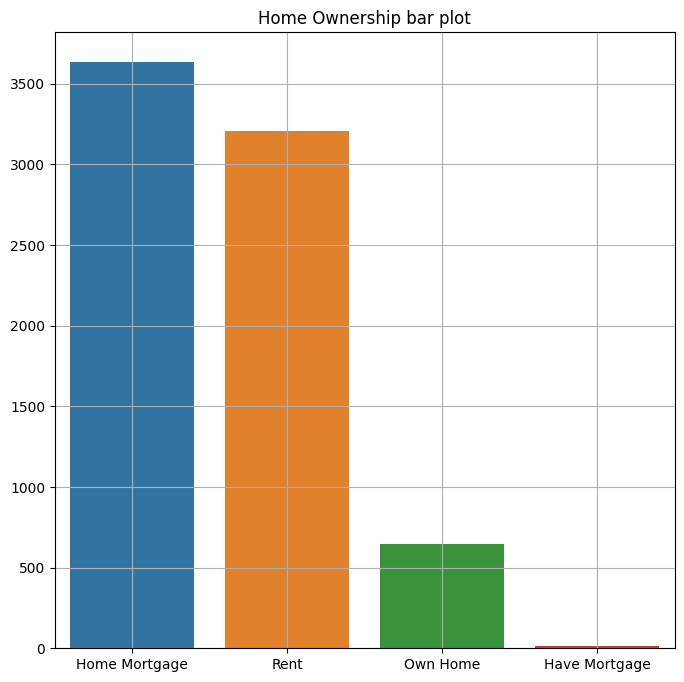

In [7]:
plot_cat_feature(df['Home Ownership'])

In [8]:
# Have mortgage и home mortgage очевидно одно и то же, поэтому объединяем. 
df.loc[df['Home Ownership']=='Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

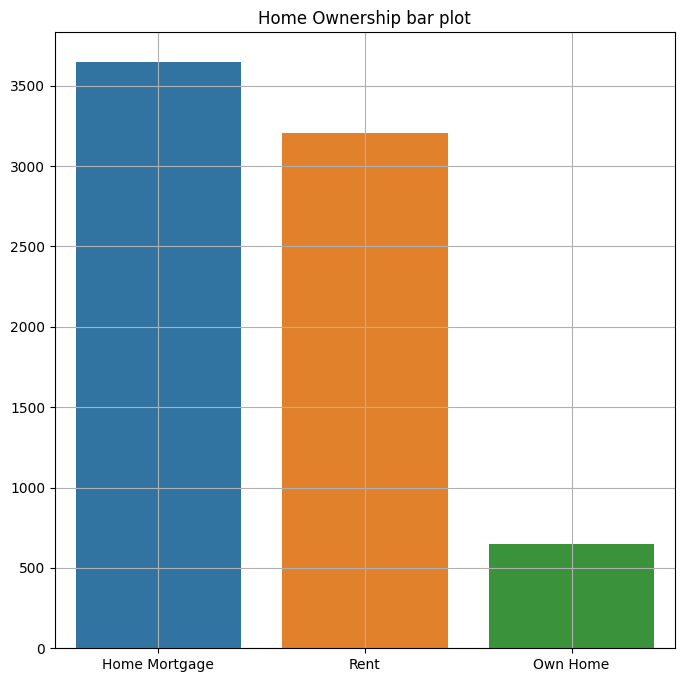

In [9]:
plot_cat_feature(df['Home Ownership'])

In [11]:
df['Home Ownership'] = df['Home Ownership'].astype('object')

### Annual Income

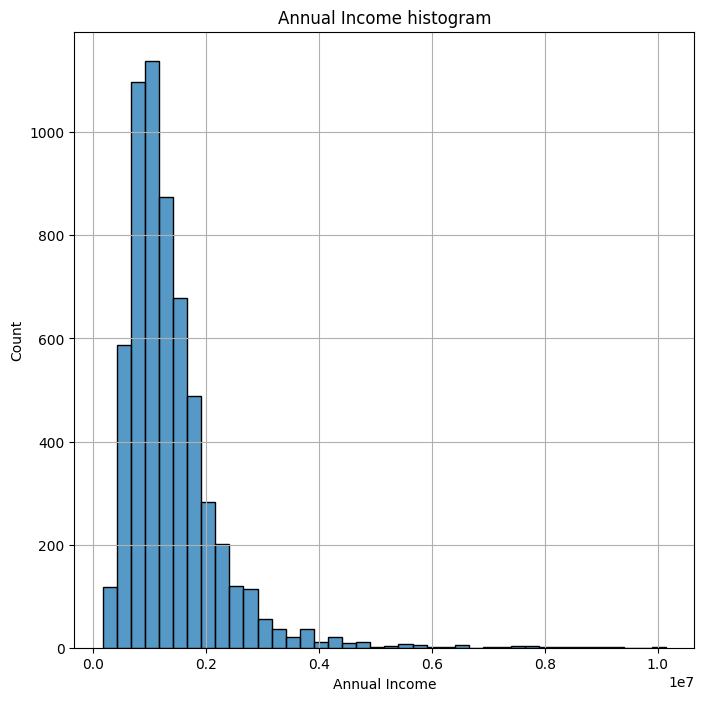

In [10]:
plot_num_feature(df['Annual Income'])

In [11]:
df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

Видим, что выбросов и аномальных значений в данных о годовом доходе нет

Посмотрим на пропущенные значения в annual income

In [13]:
df.loc[df['Annual Income'].isna(), :]['Tax Liens'].describe()

count    1557.000000
mean        0.033398
std         0.280313
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Tax Liens, dtype: float64

сравним значения со средними по датасету

In [14]:
df['Tax Liens'].describe()

count    7500.000000
mean        0.030133
std         0.271604
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Tax Liens, dtype: float64

In [20]:
df.loc[df['Annual Income'].isna(), :]['Credit Default'].value_counts(normalize=True)

0    0.660244
1    0.339756
Name: Credit Default, dtype: float64

Среди клиентов, о которых неизвестен годовой заработок, проент дефолтов выше, поэтому выбрасывать такие данные не стоит. Можем предположить, что у таких клиентов годовой заработок = 0. 

In [21]:
df.loc[df['Annual Income'].isna(), 'Annual Income'] = 0

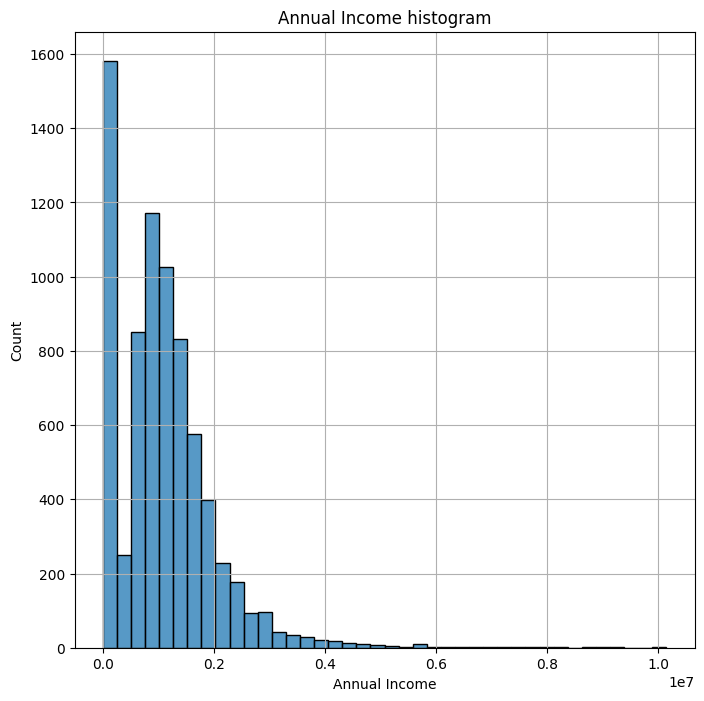

In [22]:
plot_num_feature(df['Annual Income'])

### Years in current job

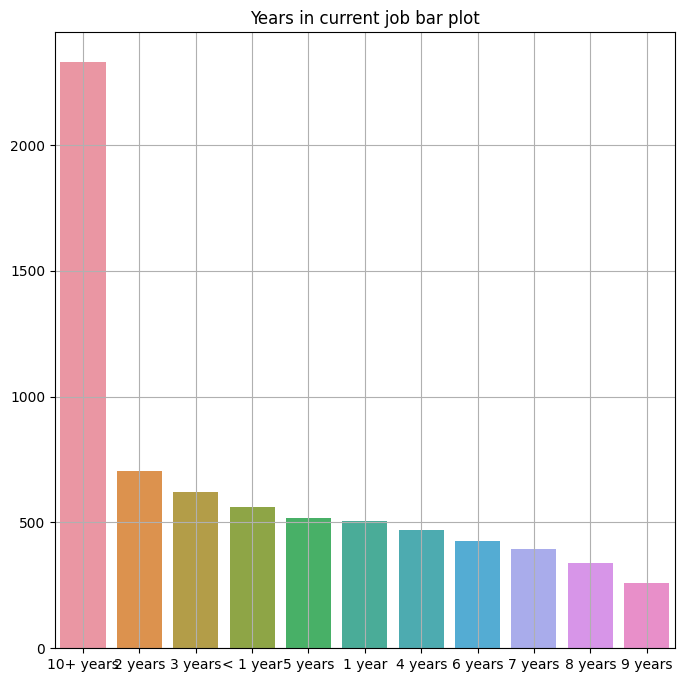

In [23]:
plot_cat_feature(df['Years in current job'])

In [33]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
unknown       371
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [24]:
df['Years in current job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7500 entries, 0 to 7499
Series name: Years in current job
Non-Null Count  Dtype 
--------------  ----- 
7129 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


Выбросов нет, посмотрим на пропуски

In [30]:
df.loc[df['Years in current job'].isna(), :]['Credit Default'].value_counts(normalize=True)

0    0.630728
1    0.369272
Name: Credit Default, dtype: float64

Среди данной группы людей процент дефолта также повышен, поэтому укажем признак как unknown

In [31]:
df.loc[df['Years in current job'].isna(), 'Years in current job'] = 'unknown'

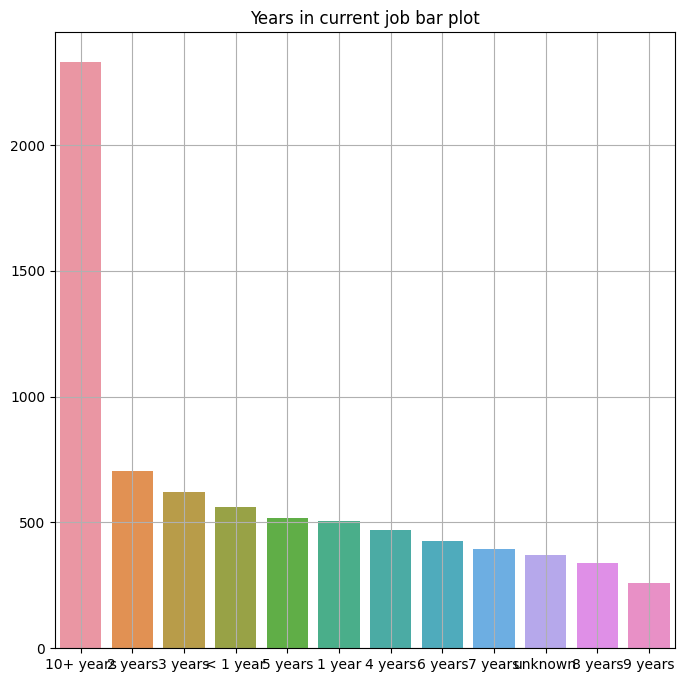

In [32]:
plot_cat_feature(df['Years in current job'])

In [10]:
df['Years in current job'] = df['Years in current job'].astype('object')

### Tax Liens

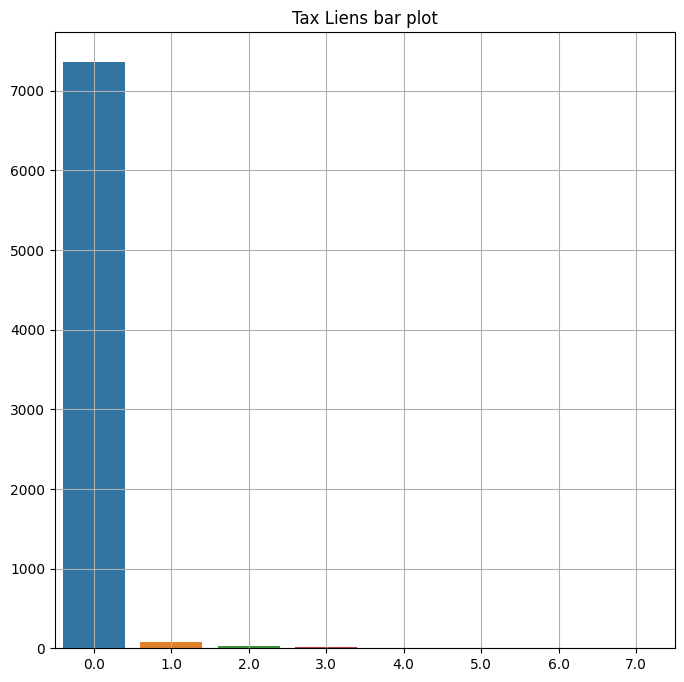

In [41]:
plot_cat_feature(df['Tax Liens'])

In [40]:
df['Tax Liens'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7500 entries, 0 to 7499
Series name: Tax Liens
Non-Null Count  Dtype   
--------------  -----   
7500 non-null   category
dtypes: category(1)
memory usage: 7.8 KB


нет выбросов, нет пропоусков, фича категориальная

In [9]:
df['Tax Liens'] = df['Tax Liens'].apply(lambda x: str(x))

In [8]:
df['Tax Liens'] = df['Tax Liens'].astype('object')

### Number of Open Accounts

In [42]:
df['Number of Open Accounts'].value_counts()

9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
32.0      6
33.0      6
31.0      6
34.0      2
37.0      2
43.0      1
41.0      1
38.0      1
35.0      1
42.0      1
Name: Number of Open Accounts, dtype: int64

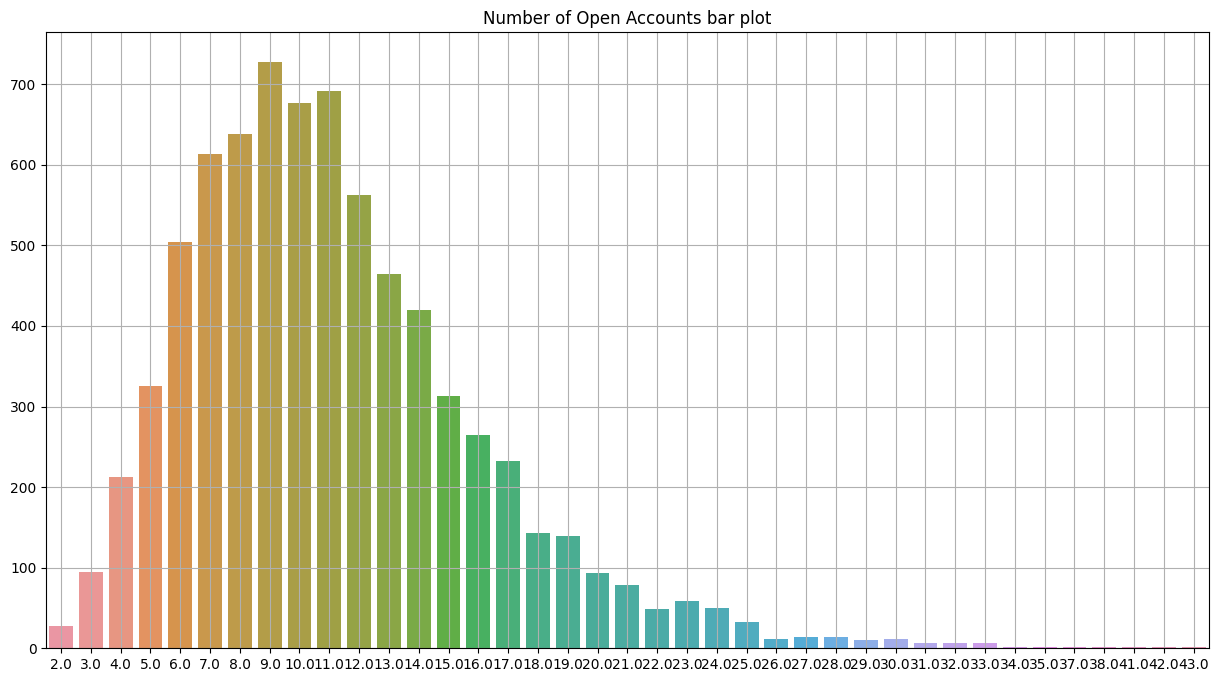

In [50]:
plot_cat_feature(df['Number of Open Accounts'], 15)

### Years of Credit History

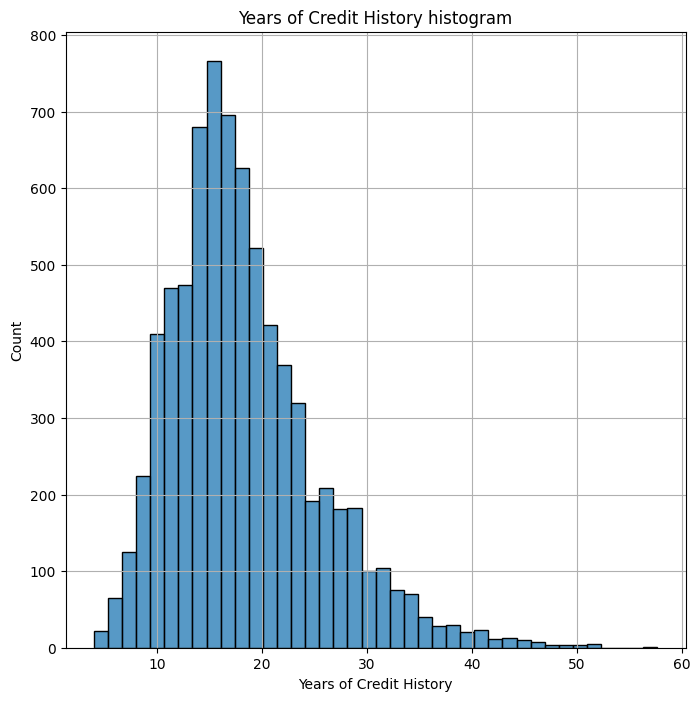

In [53]:
plot_num_feature(df['Years of Credit History'])

Нет выбросов и пропусков, фича числовая

###  Number of Credit Problems

In [54]:
df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

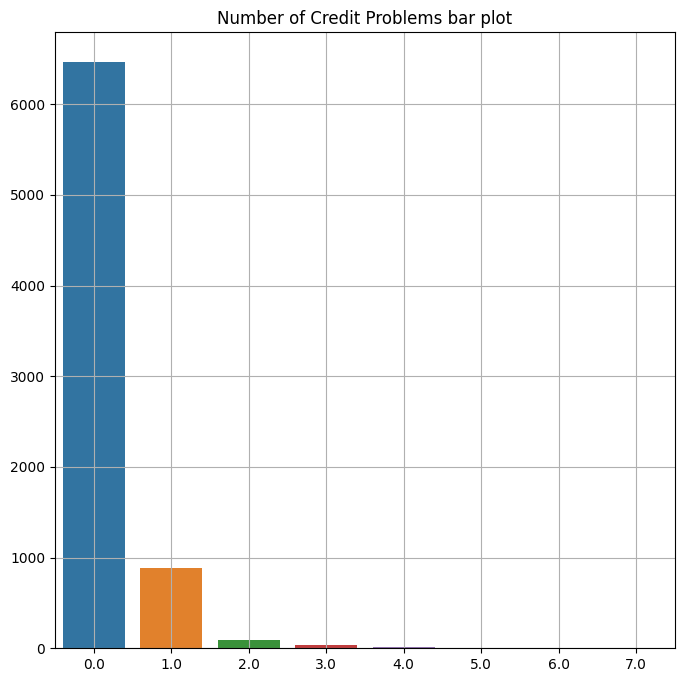

In [55]:
plot_cat_feature(df['Number of Credit Problems'])

In [6]:
df['Number of Credit Problems'] = df['Number of Credit Problems'].apply(lambda x: str(x))

In [7]:
df['Number of Credit Problems'] = df['Number of Credit Problems'].astype('object')

### Months since last delinquent

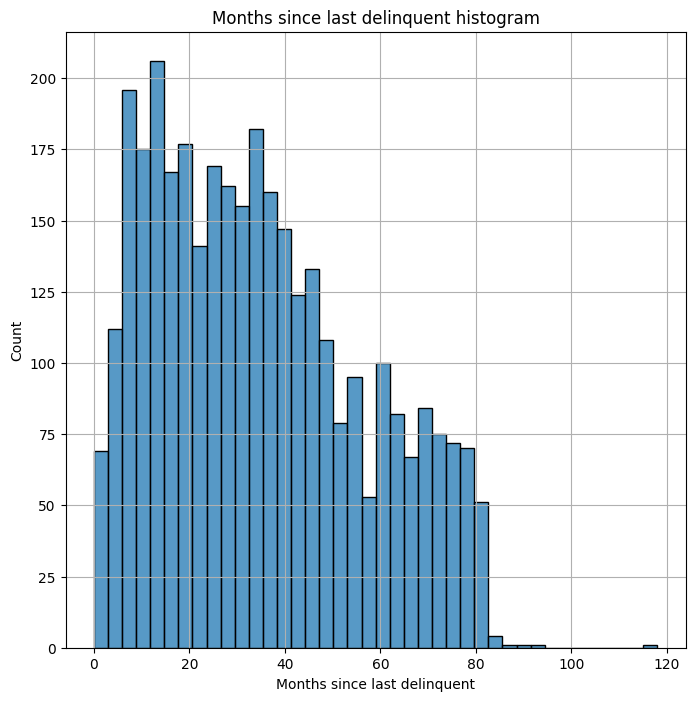

In [61]:
plot_num_feature(df['Months since last delinquent'])

в данных очень много пропусков, посмотрим на них

In [63]:
df.loc[df['Months since last delinquent'].isna(), :].head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,unknown,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [64]:
df.loc[df['Months since last delinquent'].isna(), 'Bankruptcies'].value_counts()

0.0    3621
1.0     441
2.0      15
3.0       3
4.0       1
Name: Bankruptcies, dtype: int64

In [65]:
df.loc[df['Months since last delinquent'].isna(), 'Credit Default'].value_counts(normalize=True)

0    0.723107
1    0.276893
Name: Credit Default, dtype: float64

ОЧень много пропусков, распределение по дефолту такое же

In [66]:
df.drop(columns=['Months since last delinquent'], inplace=True)

### Bankruptcies

In [67]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

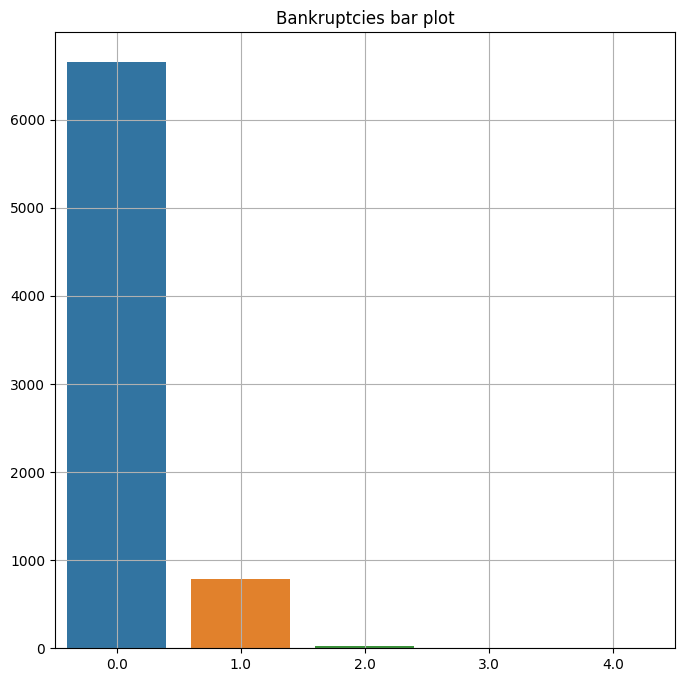

In [68]:
plot_cat_feature(df['Bankruptcies'])

фича категориальная, посмотрим на  пропуски

In [71]:
len(df.loc[df['Bankruptcies'].isna(), :])

14

всего 14 пропусков, посмотрим на них

In [72]:
df.loc[df['Bankruptcies'].isna(), :].head(14)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
100,Own Home,337079.0,1 year,0.0,9.0,39.6,644204.0,0.0,NaN,educational expenses,Short Term,99999999.0,224770.0,4326.0,734.0,0
256,Rent,857660.0,1 year,0.0,6.0,19.7,291082.0,0.0,NaN,debt consolidation,Short Term,99999999.0,236816.0,3488.0,743.0,0
257,Home Mortgage,0.0,2 years,0.0,15.0,13.6,1556390.0,0.0,NaN,debt consolidation,Short Term,447480.0,524210.0,19613.0,NaN,0
898,Rent,739005.0,2 years,0.0,20.0,18.3,2177758.0,0.0,NaN,debt consolidation,Short Term,456808.0,607487.0,9669.0,732.0,1
1404,Rent,349391.0,< 1 year,0.0,4.0,12.7,0.0,0.0,NaN,other,Short Term,11242.0,0.0,1243.0,747.0,0
3063,Rent,464474.0,10+ years,0.0,5.0,14.9,38126.0,0.0,NaN,other,Short Term,44814.0,18373.0,929.0,7490.0,1
3252,Rent,832770.0,< 1 year,0.0,7.0,16.5,636856.0,0.0,NaN,business loan,Short Term,156970.0,52250.0,1145.0,750.0,0
3351,Home Mortgage,2226192.0,8 years,0.0,14.0,23.3,792836.0,0.0,NaN,debt consolidation,Short Term,528968.0,625157.0,23746.0,674.0,0
3401,Rent,326154.0,6 years,0.0,2.0,19.1,0.0,0.0,NaN,other,Short Term,99999999.0,0.0,1245.0,712.0,0
3496,Rent,233567.0,1 year,0.0,7.0,11.7,0.0,0.0,NaN,educational expenses,Short Term,210166.0,0.0,0.0,746.0,0


у всех клиентов 0 кредитных проблем и у большинства небольшой опыт работы. можем заполнить модой - 0

In [73]:
df.loc[df['Bankruptcies'].isna(), 'Bankruptcies'] = 0

фича категориальная, приведём к строковому типу и укажем что тип категориальный

In [5]:
df['Bankruptcies'] = df['Bankruptcies'].apply(lambda x: str(x))
df['Bankruptcies'] = df['Bankruptcies'].astype('object')

### Purpose

In [80]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [76]:
df['Purpose'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7500 entries, 0 to 7499
Series name: Purpose
Non-Null Count  Dtype 
--------------  ----- 
7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


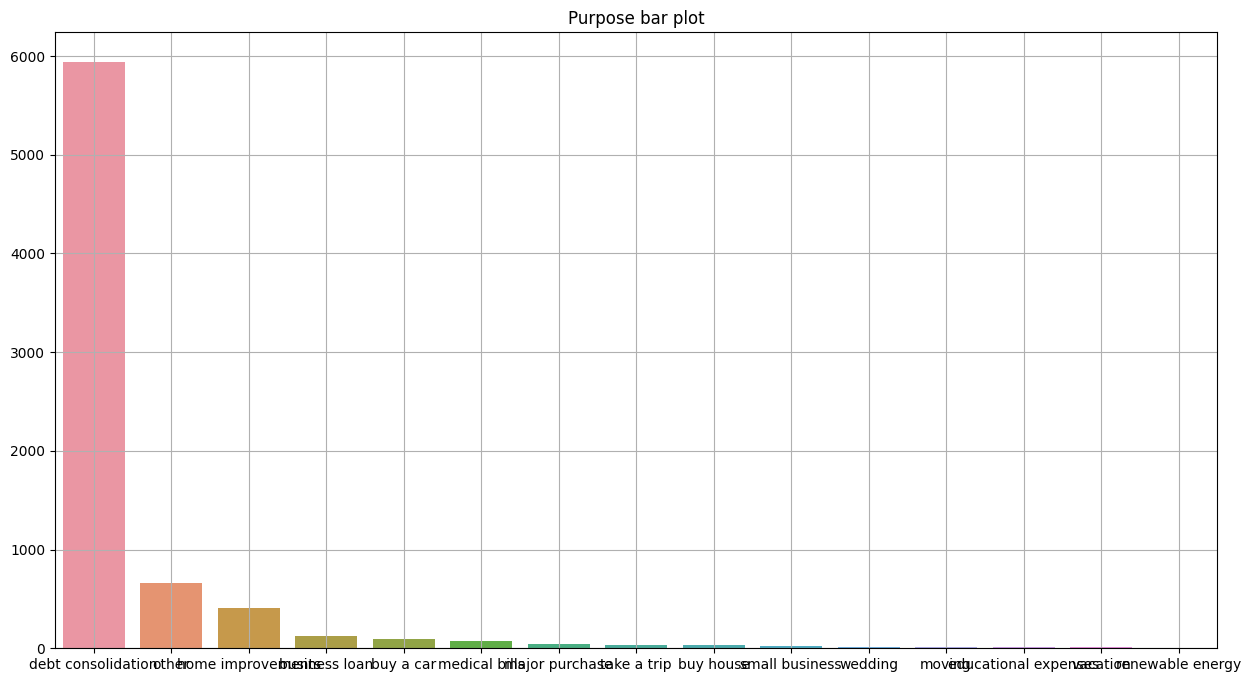

In [78]:
plot_cat_feature(df['Purpose'], 15)

пропусков нет, но в категориях есть повторы: 

- debt consolidation      5944
- other                    665
- home improvements        412
- business loan            129
- buy a car                 96
- medical bills             71
- major purchase            40
- take a trip               37
- buy house                 34
- small business            26
- wedding                   15
- moving                    11
- educational expenses      10
- vacation                   8
- renewable energy           2

можно объединить: 

business loan и small business

vacation и take a trip 


In [84]:
df.loc[df['Purpose']=='small business', 'Purpose'] = 'business loan'
df.loc[df['Purpose']=='vacation', 'Purpose'] = 'take a trip'
df.loc[df['Purpose']=='renewable energy', 'Purpose'] = 'other'



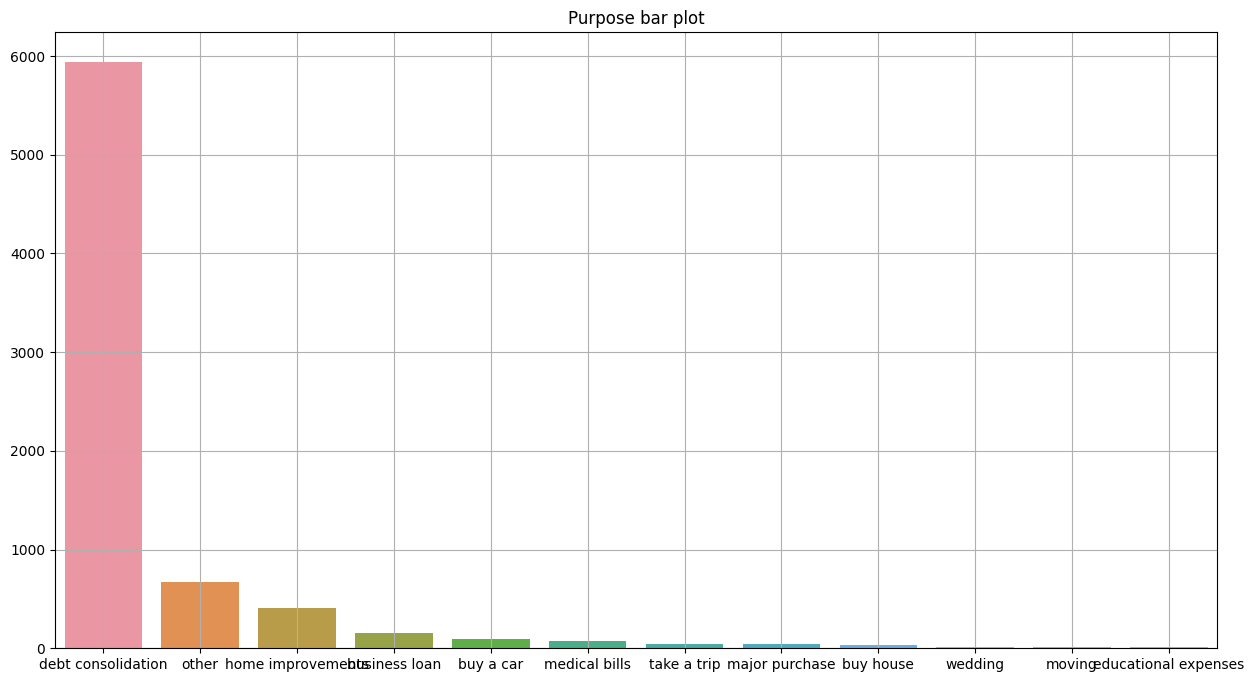

In [85]:
plot_cat_feature(df['Purpose'], 15)

In [4]:
df['Purpose'] = df['Purpose'].astype('object')

### Term

In [87]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

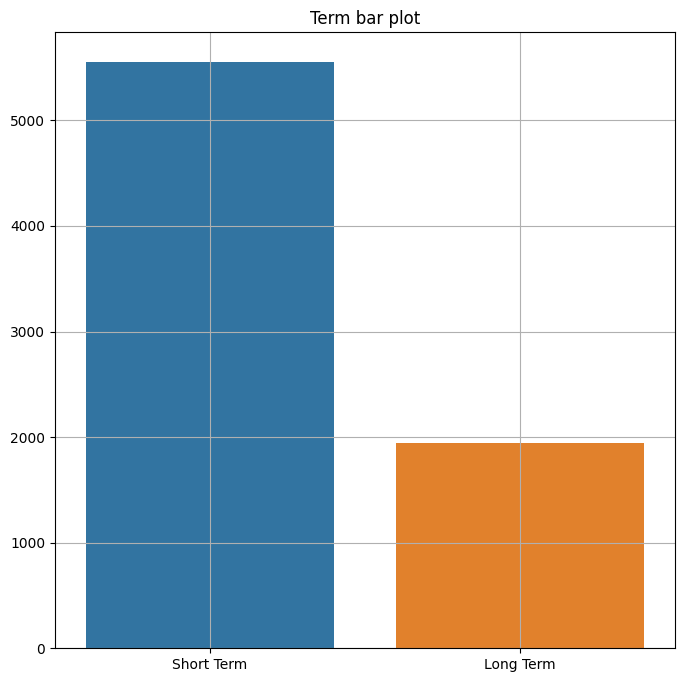

In [88]:
plot_cat_feature(df['Term'])

In [89]:
df['Term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7500 entries, 0 to 7499
Series name: Term
Non-Null Count  Dtype 
--------------  ----- 
7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


нет пропусков, фича категориальная, бинарная, можно закодировать как 0 и 1
Пусть short term = 0, a long term = 1

In [90]:
df.loc[df['Term']=='Short Term', 'Term'] = 0
df.loc[df['Term']=='Long Term', 'Term'] = 1


In [93]:
df['Term'] = df['Term'].astype('int8')

### Current Loan Amount

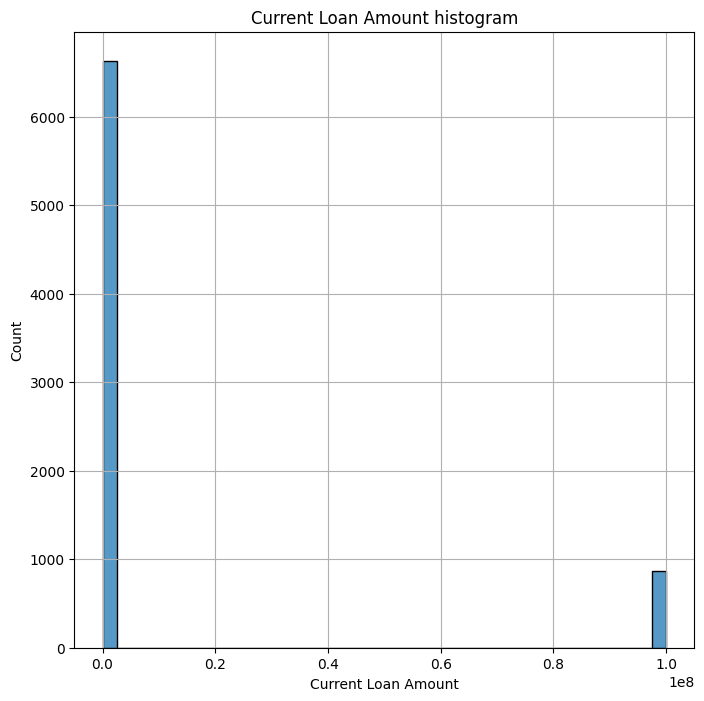

In [94]:
plot_num_feature(df['Current Loan Amount'])

In [96]:
(df['Current Loan Amount'] > 40000000).value_counts()

False    6630
True      870
Name: Current Loan Amount, dtype: int64

видим 870 выбросов, заменим на среднее

In [97]:
df.loc[df['Current Loan Amount'] > 40000000, 'Current Loan Amount'] = df['Current Loan Amount'].mean()

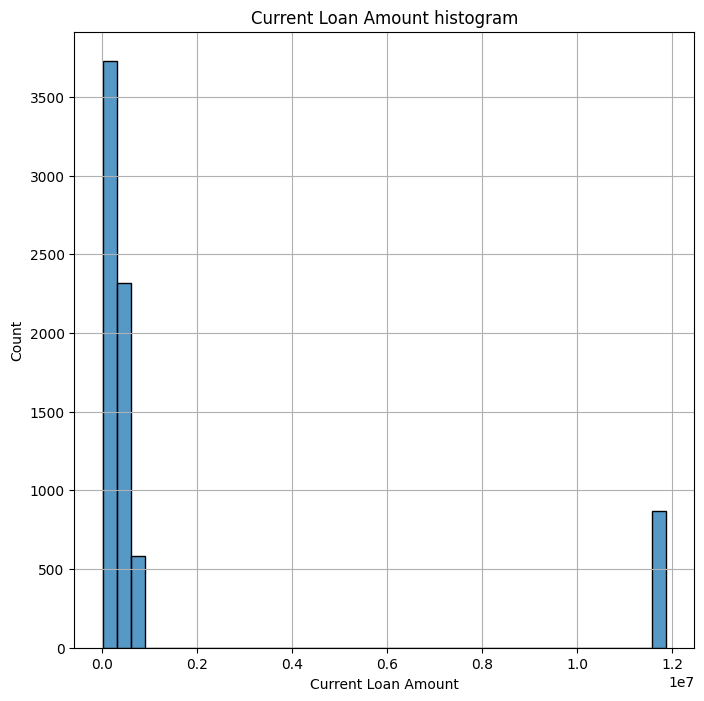

In [98]:
plot_num_feature(df['Current Loan Amount'])

ещё один выброс, 12 миллионов. попробуем оставить 12 миллионов, на этапе отбора фичей посмотрим какая корреляция.

### Current Credit Balance

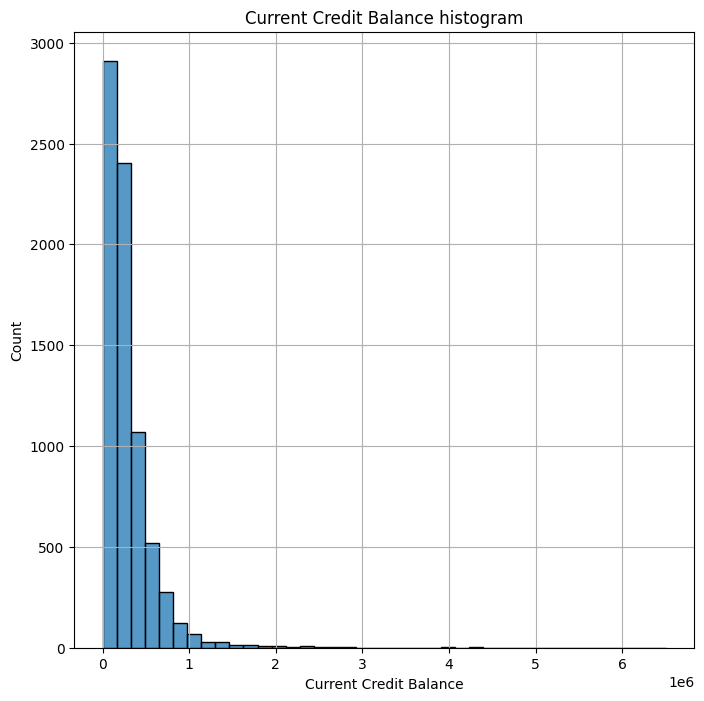

In [100]:
plot_num_feature(df['Current Credit Balance'])

### Monthly Debt

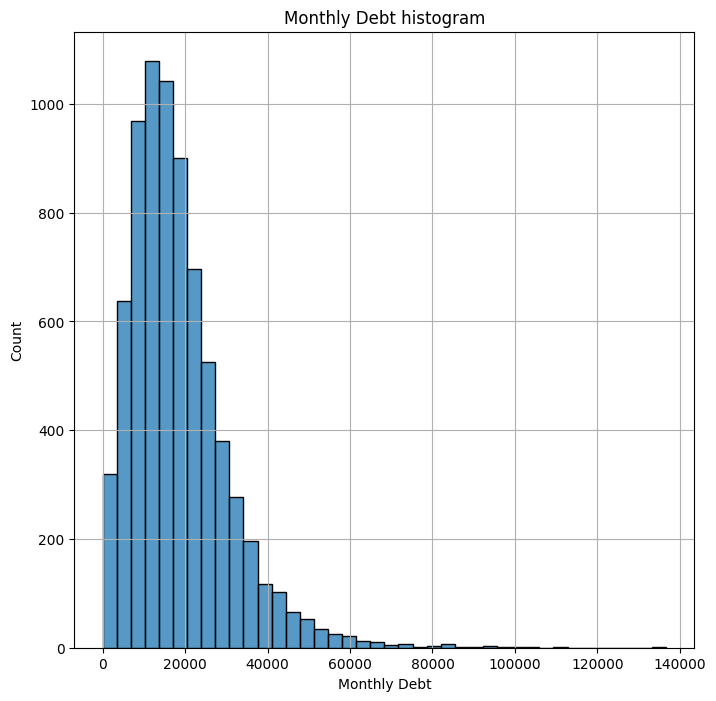

In [101]:
plot_num_feature(df['Monthly Debt'])

тут нет выбросов, нет пропусков

### Credit Score

In [103]:
(df['Credit Score'].isna()).value_counts()

False    5943
True     1557
Name: Credit Score, dtype: int64

Видим 1557 пропусков, посмотрим на распределение

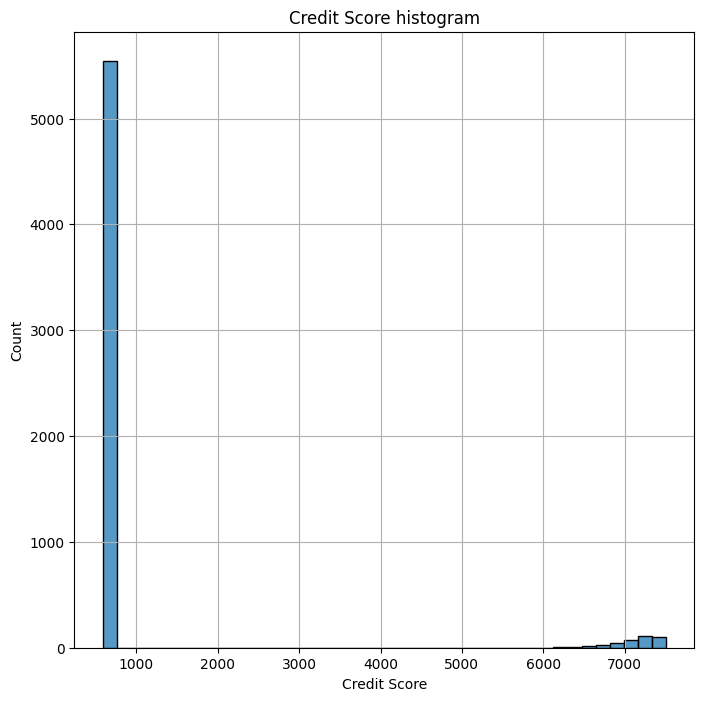

In [104]:
plot_num_feature(df['Credit Score'])

Распределение Credit Score от 5000 до 7500

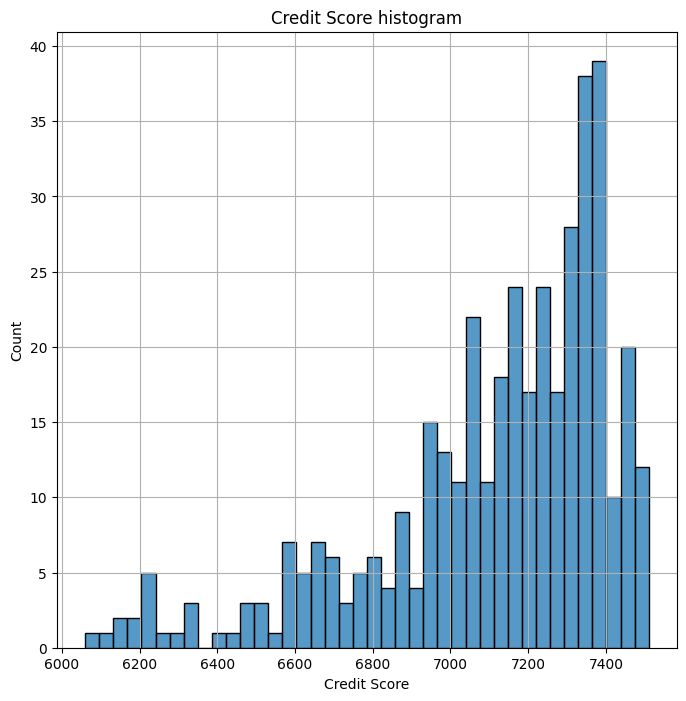

In [105]:
plot_num_feature(df.loc[df['Credit Score']>5000, 'Credit Score'])

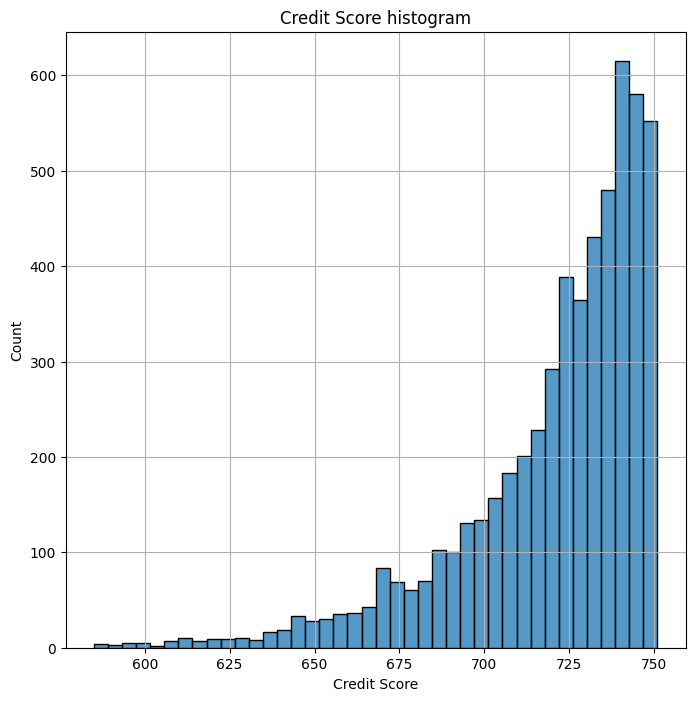

In [106]:
plot_num_feature(df.loc[df['Credit Score']<1000, 'Credit Score'])

После 750 резко исчезают объекты, и после появляются только начиная с 6000. Есть вероятность что на интервале от 6000 до 7500 данные неверны, и их необходимо поделить на 10. 

In [111]:
df.loc[df['Credit Score']>5000, :].sample(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
5647,Home Mortgage,657153.0,10+ years,0.0,5.0,15.1,706816.0,0.0,0.0,debt consolidation,0,104346.0,568328.0,8488.0,7360.0,1
355,Rent,960184.0,10+ years,0.0,9.0,43.3,301026.0,0.0,0.0,debt consolidation,0,87912.0,86051.0,3433.0,7500.0,1
6536,Home Mortgage,967385.0,10+ years,0.0,7.0,21.0,190498.0,0.0,0.0,home improvements,1,492866.0,141968.0,17171.0,6650.0,1
1697,Home Mortgage,1509056.0,7 years,0.0,10.0,14.7,576708.0,0.0,0.0,debt consolidation,1,253902.0,448267.0,42254.0,6710.0,1
2383,Home Mortgage,967290.0,6 years,0.0,10.0,11.4,859628.0,0.0,0.0,debt consolidation,0,498410.0,266532.0,21925.0,7120.0,1


In [112]:
df.loc[df['Credit Score']<1000, :].sample(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
4737,Home Mortgage,575415.0,< 1 year,0.0,7.0,16.8,1103036.0,0.0,0.0,debt consolidation,0,2.037640e+05,324843.0,4316.0,740.0,0
2261,Rent,1156986.0,7 years,0.0,13.0,18.9,609554.0,0.0,0.0,debt consolidation,0,2.679380e+05,327959.0,29407.0,739.0,0
6075,Home Mortgage,1179653.0,5 years,0.0,20.0,14.4,489896.0,0.0,0.0,debt consolidation,0,1.187318e+07,145540.0,16908.0,745.0,0
6097,Home Mortgage,811490.0,4 years,0.0,6.0,15.1,326436.0,0.0,0.0,business loan,0,3.316720e+05,157320.0,7709.0,713.0,0
5782,Rent,998374.0,3 years,0.0,8.0,6.5,389092.0,0.0,0.0,debt consolidation,0,2.000900e+05,153900.0,7987.0,743.0,1


In [113]:
df.loc[df['Credit Score']>5000, 'Credit Score'] = df.loc[df['Credit Score']>5000, 'Credit Score'] / 10

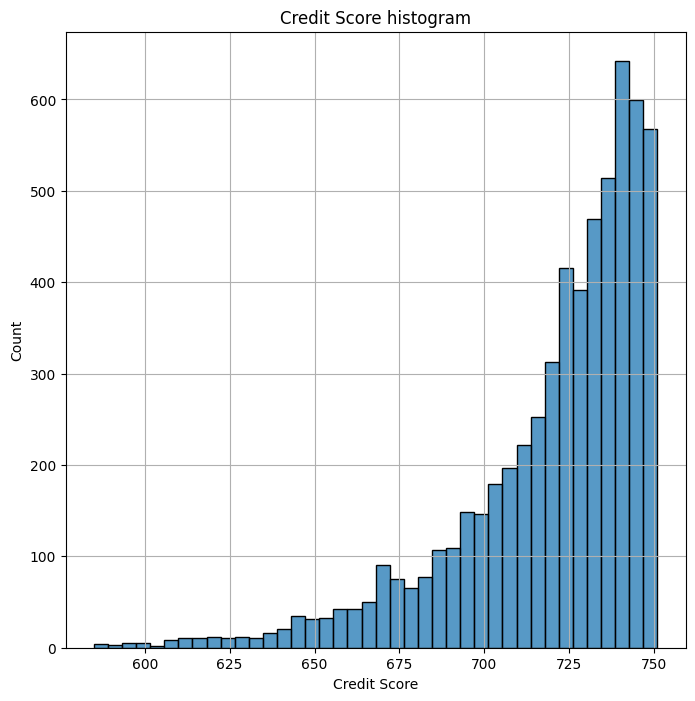

In [114]:
plot_num_feature(df['Credit Score'])

Посмотрим на выбросы

In [115]:
df['Credit Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7500 entries, 0 to 7499
Series name: Credit Score
Non-Null Count  Dtype  
--------------  -----  
5943 non-null   float64
dtypes: float64(1)
memory usage: 58.7 KB


In [116]:
df.loc[df['Credit Score'].isna(), :].head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
5,Rent,0.0,7 years,0.0,12.0,14.6,366784.0,0.0,0.0,other,1,337304.0,165680.0,18692.0,NaN,1
8,Home Mortgage,0.0,5 years,0.0,17.0,15.7,0.0,1.0,1.0,home improvements,0,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,0.0,1 year,0.0,10.0,24.6,511302.0,0.0,0.0,debt consolidation,1,572880.0,205333.0,17613.0,NaN,1
10,Home Mortgage,0.0,< 1 year,0.0,7.0,11.5,256322.0,0.0,0.0,debt consolidation,0,220858.0,187492.0,14592.0,NaN,0
16,Rent,0.0,7 years,0.0,6.0,17.8,899492.0,0.0,0.0,debt consolidation,1,313038.0,538346.0,18844.0,NaN,1
23,Own Home,0.0,10+ years,0.0,17.0,14.8,700040.0,0.0,0.0,debt consolidation,0,174878.0,168074.0,17132.0,NaN,1
24,Own Home,0.0,unknown,0.0,12.0,25.0,1216336.0,0.0,0.0,debt consolidation,0,467676.0,818311.0,37530.0,NaN,0
29,Rent,0.0,10+ years,0.0,9.0,18.6,186494.0,0.0,0.0,debt consolidation,0,357918.0,72808.0,22352.0,NaN,1
33,Home Mortgage,0.0,< 1 year,0.0,13.0,21.0,101464.0,0.0,0.0,other,0,79464.0,60287.0,14003.0,NaN,1
35,Rent,0.0,< 1 year,0.0,9.0,31.4,1457104.0,0.0,0.0,buy a car,0,155474.0,254201.0,7020.0,NaN,0


In [117]:
df.loc[df['Credit Score'].isna(), 'Annual Income'].value_counts()

0.0    1557
Name: Annual Income, dtype: int64

во всех пропусках по Credit Score Annual Income были пропуски. Это означает что скорее всего в расчете кредитоного рейтинга участвует годовой доход. Заполним медианными значениями

In [118]:
df.loc[df['Credit Score'].isna(), 'Credit Score'] = df['Credit Score'].median()

### Оценка целевой переменной Credit Default

In [119]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Видим явный дисбаланс классов в соотношении 1:2.5

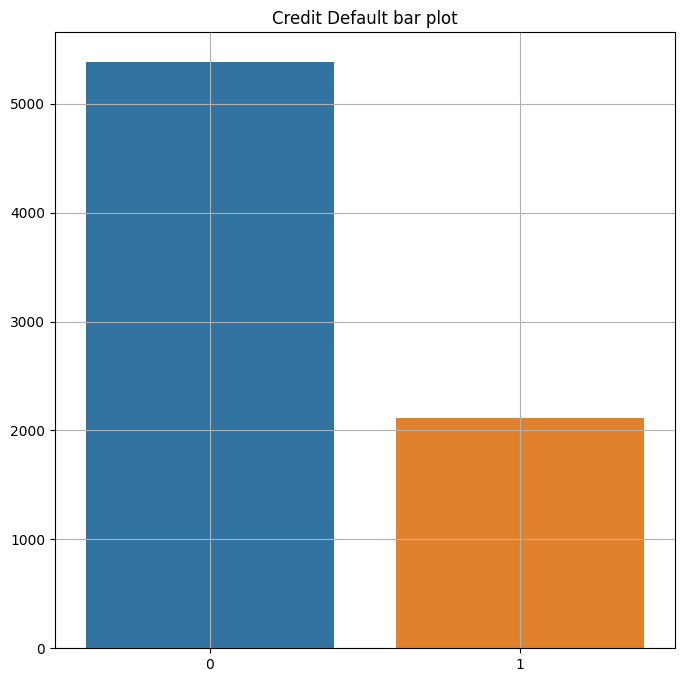

In [120]:
plot_cat_feature(df['Credit Default'])

### Приведение категориальных признаков

In [121]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,unknown,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,0,1.187318e+07,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,1,2.649680e+05,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,0,1.187318e+07,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,1.0,debt consolidation,0,1.213960e+05,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,debt consolidation,0,1.258400e+05,93309.0,7180.0,719.0,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Home Ownership             7500 non-null   category
 1   Annual Income              7500 non-null   float64 
 2   Years in current job       7500 non-null   category
 3   Tax Liens                  7500 non-null   category
 4   Number of Open Accounts    7500 non-null   float64 
 5   Years of Credit History    7500 non-null   float64 
 6   Maximum Open Credit        7500 non-null   float64 
 7   Number of Credit Problems  7500 non-null   category
 8   Bankruptcies               7500 non-null   category
 9   Purpose                    7500 non-null   category
 10  Term                       7500 non-null   int8    
 11  Current Loan Amount        7500 non-null   float64 
 12  Current Credit Balance     7500 non-null   float64 
 13  Monthly Debt               7500 n

In [13]:
columns_to_rename = {
    'Home Ownership': 'home_ownership',
    'Annual Income': 'income',
    'Years in current job': 'years_in_current_job',
    'Tax Liens': 'tax_liens',
    'Number of Open Accounts': 'number_of_open_accounts',
    'Years of Credit History': 'years_of_credit_history',
    'Maximum Open Credit': 'maximum_open_credit',
    'Number of Credit Problems': 'number_of_credit_problem',
    'Bankruptcies': 'bankruptcies',
    'Purpose': 'purpose',
    'Term': 'term',
    'Current Loan Amount': 'current_loan_amount',
    'Current Credit Balance': 'current_credit_balance',
    'Monthly Debt': 'monthly_debt',
    'Credit Score': 'credit_score',
    'Credit Default': 'credit_default'
}


df.rename(columns=columns_to_rename, inplace=True)

In [14]:
df.to_csv('../data/train_prepared_without_cat_encoding.csv', index=False)

In [15]:
df.head()

,home_ownership,income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problem,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,Own Home,482087.0,unknown,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,0,1.187318e+07,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,1,2.649680e+05,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,0,1.187318e+07,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,1.0,debt consolidation,0,1.213960e+05,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,debt consolidation,0,1.258400e+05,93309.0,7180.0,719.0,0


Для того чтобы определить как наилучшим способом закодировать категориальные фичи есть множество правил-подсказок

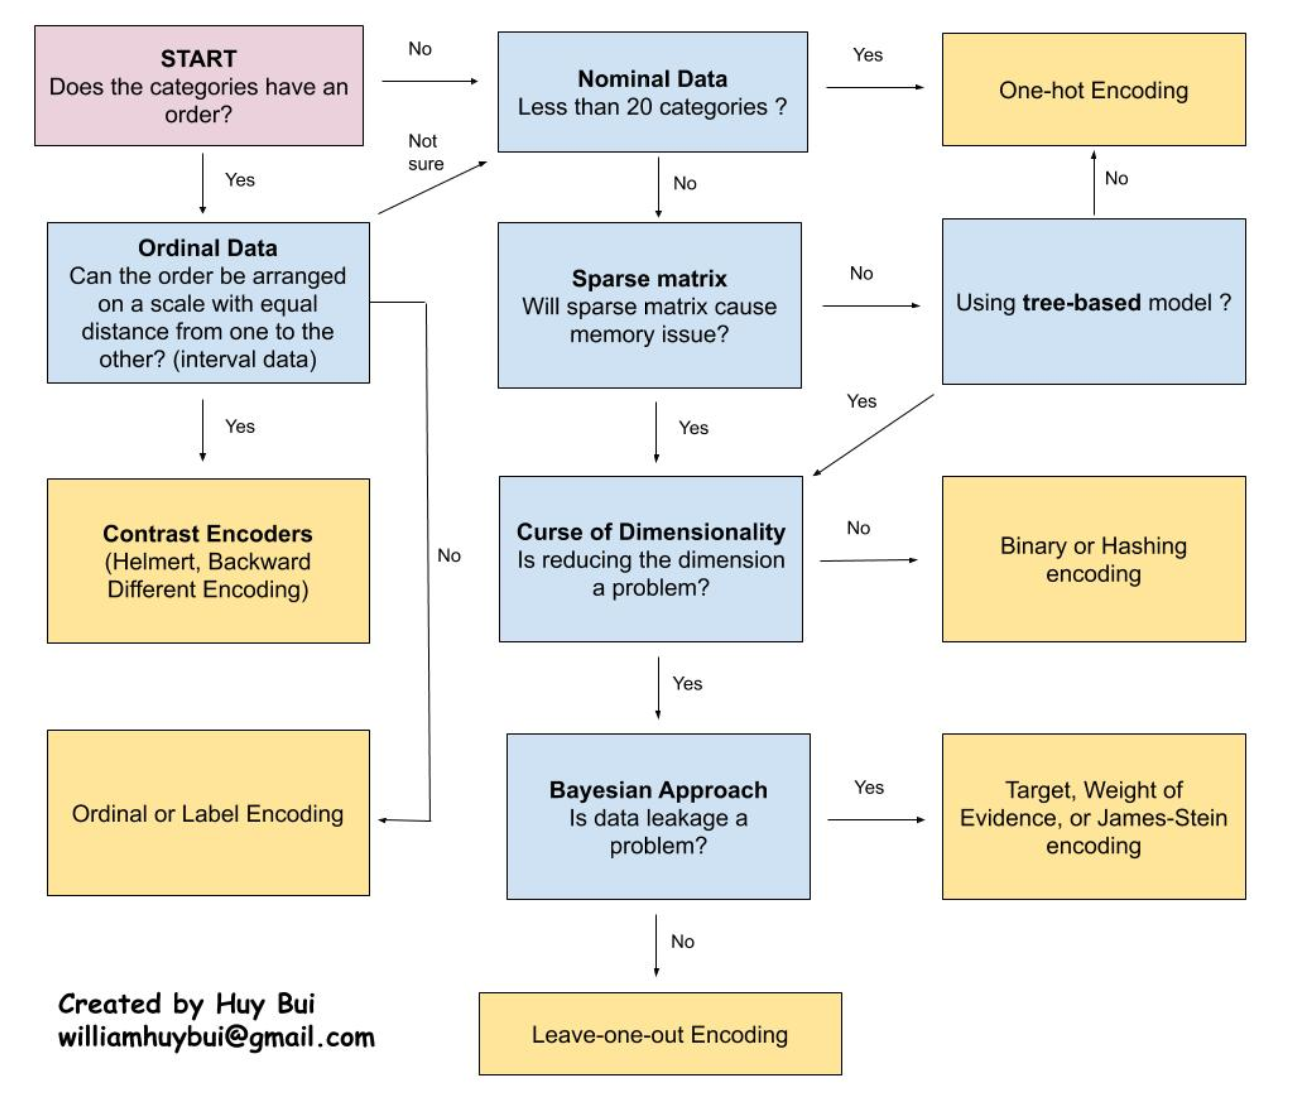

In [2]:
df = pd.read_csv('../data/train_prepared_without_cat_encoding.csv')

In [16]:
cat_feteatures = df.select_dtypes(include=['object']).columns

In [19]:
df = pd.get_dummies(data=df, columns=cat_feteatures)
df.head()

,income,number_of_open_accounts,years_of_credit_history,maximum_open_credit,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default,...,purpose_buy house,purpose_debt consolidation,purpose_educational expenses,purpose_home improvements,purpose_major purchase,purpose_medical bills,purpose_moving,purpose_other,purpose_take a trip,purpose_wedding
0,482087.0,11.0,26.3,685960.0,0,1.187318e+07,47386.0,7914.0,749.0,0,...,0,1,0,0,0,0,0,0,0,0
1,1025487.0,15.0,15.3,1181730.0,1,2.649680e+05,394972.0,18373.0,737.0,1,...,0,1,0,0,0,0,0,0,0,0
2,751412.0,11.0,35.0,1182434.0,0,1.187318e+07,308389.0,13651.0,742.0,0,...,0,1,0,0,0,0,0,0,0,0
3,805068.0,8.0,22.5,147400.0,0,1.213960e+05,95855.0,11338.0,694.0,0,...,0,1,0,0,0,0,0,0,0,0
4,776264.0,13.0,13.6,385836.0,0,1.258400e+05,93309.0,7180.0,719.0,0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   income                          7500 non-null   float64
 1   number_of_open_accounts         7500 non-null   float64
 2   years_of_credit_history         7500 non-null   float64
 3   maximum_open_credit             7500 non-null   float64
 4   term                            7500 non-null   int64  
 5   current_loan_amount             7500 non-null   float64
 6   current_credit_balance          7500 non-null   float64
 7   monthly_debt                    7500 non-null   float64
 8   credit_score                    7500 non-null   float64
 9   credit_default                  7500 non-null   int64  
 10  home_ownership_Home Mortgage    7500 non-null   uint8  
 11  home_ownership_Own Home         7500 non-null   uint8  
 12  home_ownership_Rent             75

In [21]:
df.to_csv('../data/train_prepared_one_hot_encoded.csv', index=False)